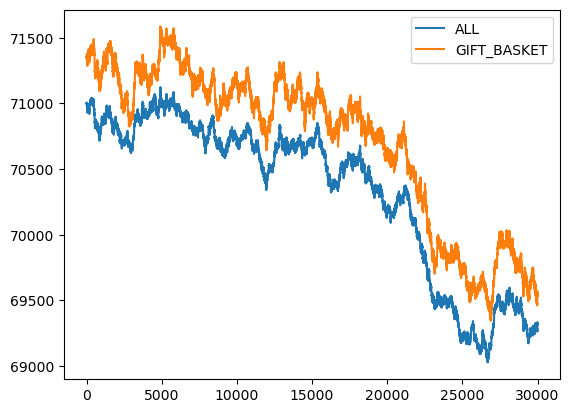

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

import os
os.chdir("/Users/qianwang/Desktop/TradingChallenge")

filenames = ["codes/round_3/round-3-island-data-bottle/prices_round_3_day_0.csv",
             "codes/round_3/round-3-island-data-bottle/prices_round_3_day_1.csv",
             "codes/round_3/round-3-island-data-bottle/prices_round_3_day_2.csv",]

products = ["CHOCOLATE", "STRAWBERRIES", "ROSES","GIFT_BASKET"]
mid_prices = {}
pair_buy_prices = np.array([])
pair_sell_prices = np.array([])
for fname in filenames:
    df = pd.read_csv(fname, sep=';')
    for prod in products:
        product_rows = df["product"] == prod
        mid_price = (df["ask_price_1"][product_rows].to_numpy() + df["bid_price_1"][product_rows].to_numpy()) /2
        try:
            mid_prices[prod] = np.append(mid_prices[prod], mid_price)
        except KeyError:
            mid_prices[prod] = mid_price


    b = df["ask_price_1"][df["product"] == "GIFT_BASKET"].to_numpy() - \
        df["bid_price_1"][df["product"] == "CHOCOLATE"].to_numpy() * 4 - \
        df["bid_price_1"][df["product"] == "STRAWBERRIES"].to_numpy() * 6 - \
        df["bid_price_1"][df["product"] == "ROSES"].to_numpy()
    pair_buy_prices = np.append(pair_buy_prices, b)
    
    s = df["bid_price_1"][df["product"] == "GIFT_BASKET"].to_numpy() - \
        df["ask_price_1"][df["product"] == "CHOCOLATE"].to_numpy() * 4 - \
        df["ask_price_1"][df["product"] == "STRAWBERRIES"].to_numpy() * 6 - \
        df["ask_price_1"][df["product"] == "ROSES"].to_numpy()
    pair_sell_prices = np.append(pair_sell_prices, s)

pair_mid_prices = (pair_buy_prices + pair_sell_prices ) /2

mid_prices_diff = mid_prices["CHOCOLATE"]*4 + mid_prices["STRAWBERRIES"]*6 + mid_prices["ROSES"] - mid_prices["GIFT_BASKET"]
plt.plot(mid_prices["CHOCOLATE"]*4 + mid_prices["STRAWBERRIES"]*6 + mid_prices["ROSES"], label="ALL")
plt.plot(mid_prices["GIFT_BASKET"], label="GIFT_BASKET")
plt.legend()
plt.show()

In [2]:
np.mean(mid_prices_diff), np.std(mid_prices_diff)

(-379.4904833333333, 76.42310842343252)

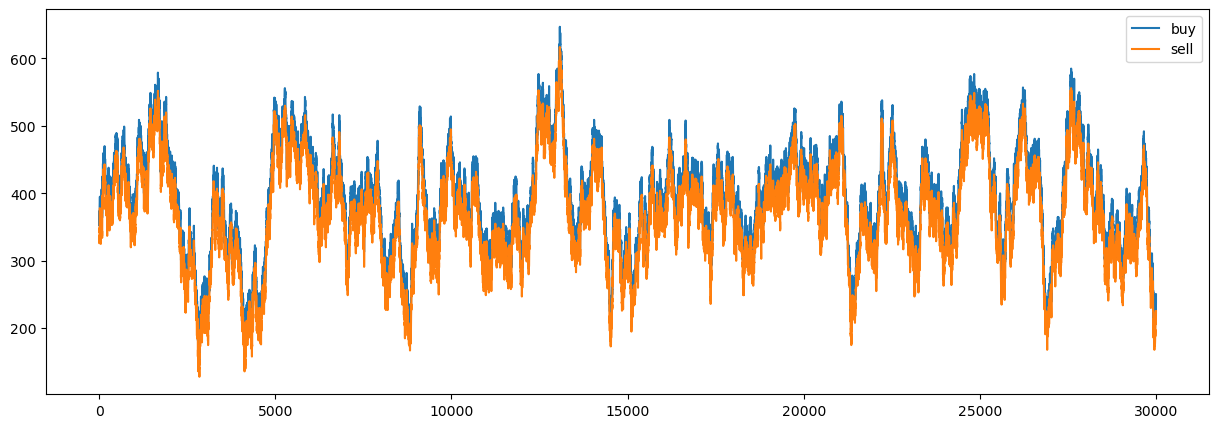

In [3]:
plt.figure(figsize=(15, 5))
plt.plot(pair_buy_prices, label="buy")
plt.plot(pair_sell_prices, label="sell")
# plt.plot(pair_mid_prices, label="mid")
# plt.plot(pair_buy_prices - pair_sell_prices, label="diff")
plt.legend()
plt.show()

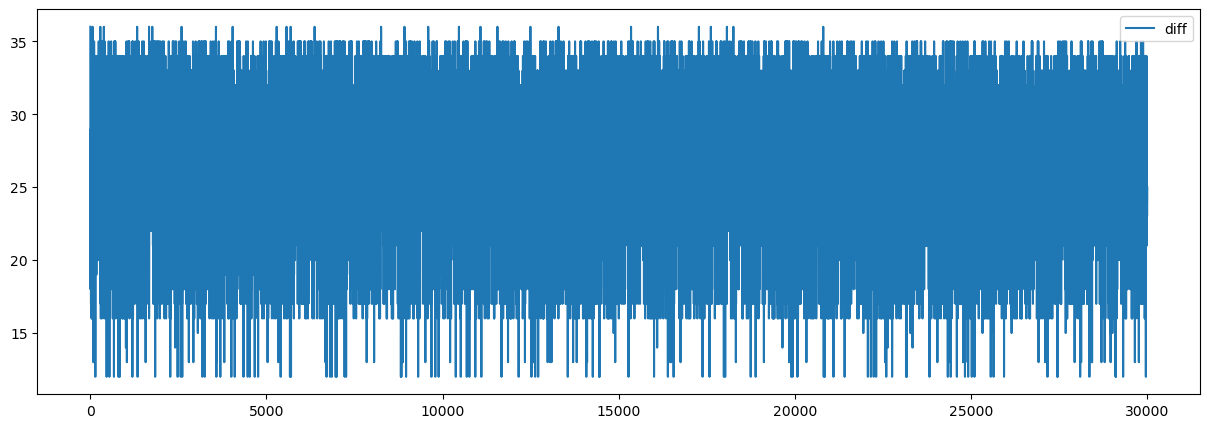

In [16]:
plt.figure(figsize=(15, 5))
# plt.plot(pair_buy_prices, label="buy")
# plt.plot(pair_sell_prices, label="sell")
# plt.plot(pair_mid_prices, label="mid")
plt.plot((pair_buy_prices - pair_sell_prices), label="diff")
plt.legend()
plt.show()

In [5]:
np.mean(pair_mid_prices), np.std(pair_mid_prices)

(379.4904833333333, 76.42310842343252)

In [6]:
adfuller(pair_mid_prices)

(-6.446360786110695,
 1.5623227975526224e-08,
 1,
 29998,
 {'1%': -3.430568009855954,
  '5%': -2.8616363544632057,
  '10%': -2.566821286540422},
 194520.08911243273)

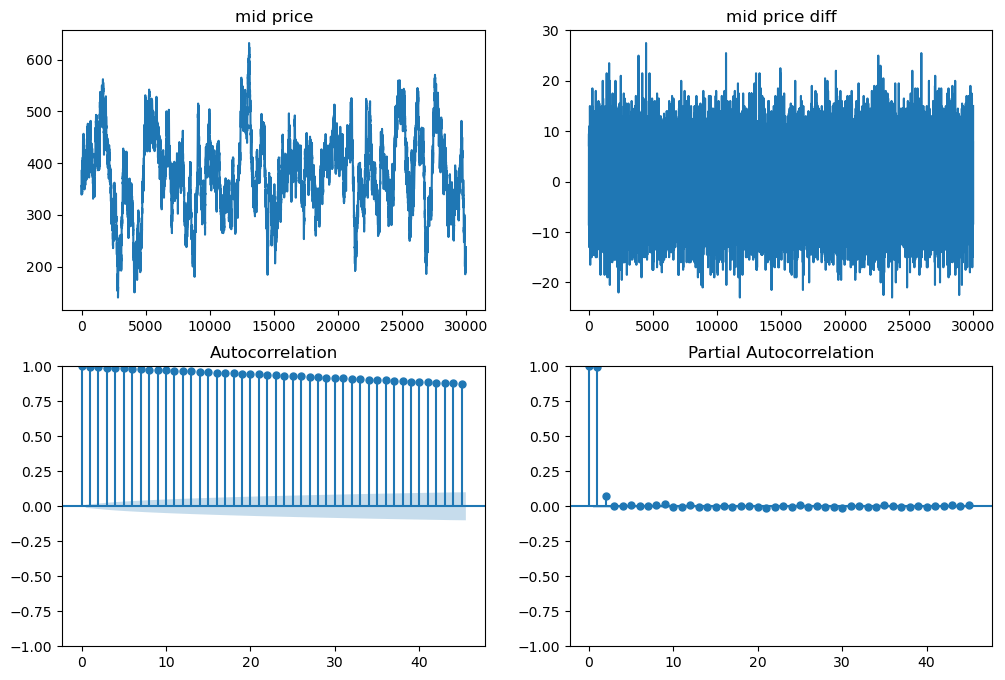

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes[0, 0].plot(pair_mid_prices)
axes[0, 0].set_title('mid price')

pair_mid_price_diff = np.diff(pair_mid_prices)
axes[0, 1].plot(pair_mid_price_diff)
axes[0, 1].set_title('mid price diff')

plot_acf(pair_mid_prices, ax=axes[1, 0])
plot_pacf(pair_mid_prices, ax=axes[1, 1])

plt.show()

In [8]:
model = ARIMA(pair_mid_prices-pair_mid_prices[0], order=(2,0,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                30000
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -97423.994
Date:                Thu, 18 Apr 2024   AIC                         194855.987
Time:                        20:19:35   BIC                         194889.223
Sample:                             0   HQIC                        194866.651
                              - 30000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.4905     11.830      2.070      0.038       1.304      47.677
ar.L1          0.9231      0.006    162.081      0.000       0.912       0.934
ar.L2          0.0738      0.006     12.972      0.0

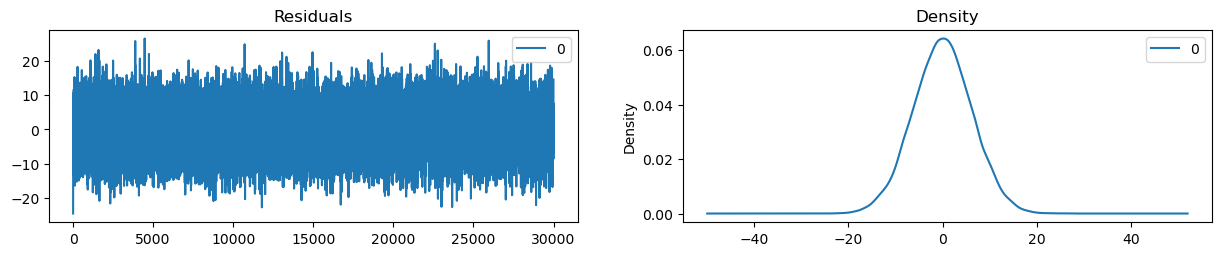

In [9]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(15, 2.5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

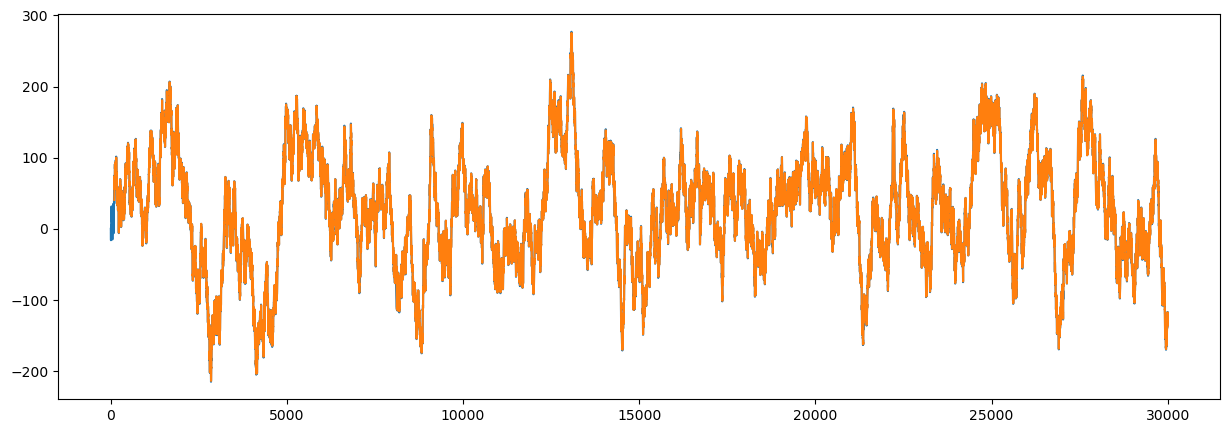

In [10]:
fig, ax = plt.subplots(figsize=(15,5))
# ax = mid_price.plot(ax=ax)
plt.plot(np.arange(len(pair_mid_prices)), pair_mid_prices - pair_mid_prices[0])
plt.plot(np.arange(100, len(pair_mid_prices)), model_fit.predict(100, len(pair_mid_prices)-1, dynamic=False))
# plt.plot((pair_mid_prices - pair_mid_prices[0])[100:] - model_fit.predict(100, len(pair_mid_prices)-1, dynamic=False))
plt.show()